In [41]:
import pandas as pd
import numpy as np

In [42]:
tesla_df = pd.read_csv("tsla_2014_2023.csv")

Splitting the data

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,adjusted_rand_score
from sklearn.pipeline import make_pipeline
from  sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [44]:
x,y = tesla_df.drop(['next_day_close','date'],axis=1),tesla_df['next_day_close']

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [46]:
col = x_train.columns

In [47]:
trf1 = RobustScaler()

In [48]:
trf2 = LinearRegression()

In [49]:
model = make_pipeline(trf1,trf2)

In [50]:
model.fit(x_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('linearregression', LinearRegression())])

In [51]:
y_pred = model.predict(x_test)

In [62]:
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2.839951823241983
34.7162280772175
0.9971141291379516


In [53]:
x_train.shape

(1761, 18)

In [54]:
from tensorflow.keras.layers import Dense,Dropout,LSTM,GRU
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.losses import Huber,MAE
from tensorflow.keras.activations import relu,elu,selu
from tensorflow.keras.models import Sequential

In [55]:
# model = Sequential()
# model.add(Dense(256,activation=relu,input_dim=18))
# model.add(Dropout(0.2))
# model.add(Dense(128,activation=relu))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(32,activation='relu'))
# model.add(Dense(1,activation='linear'))

# model.compile(optimizer=RMSprop(),loss=Huber(0.5),metrics=['mae'])
# model.summary()

In [56]:
model = Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(30))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer=Adam(),loss='huber',metrics=['mae'])
model.summary()

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 20, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 20, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 30)             │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │         3,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,921 (327.82 KB)

 Trainable params: 83,921 (327.82 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
st = StandardScaler()
x_train_trf = st.fit_transform(x_train)
x_test_trf = st.transform(x_test)

In [58]:
history = model.fit(x_train_trf,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50


56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 92.7177 - mae: 93.2176 - val_loss: 86.9638 - val_mae: 87.4638
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 78.0417 - mae: 78.5231 - val_loss: 79.3479 - val_mae: 79.8479
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 69.9178 - mae: 70.4034 - val_loss: 86.9873 - val_mae: 87.4871
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 58.1728 - mae: 58.6575 - val_loss: 100.7696 - val_mae: 101.2691
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 42.9461 - mae: 43.4262 - val_loss: 120.1681 - val_mae: 120.6679
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 26.7988 - mae: 27.2770 - val_loss: 141.0892 - val_mae: 141.5880
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 20.4774 - mae: 20.9599 - val_loss: 154.5086 - val_mae: 155.0086
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 19.3668 - mae: 19.8404 - val_loss: 156.6526 - val_mae: 157.1511
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━

In [59]:
min(history.history['mae'])

3.8655776977539062

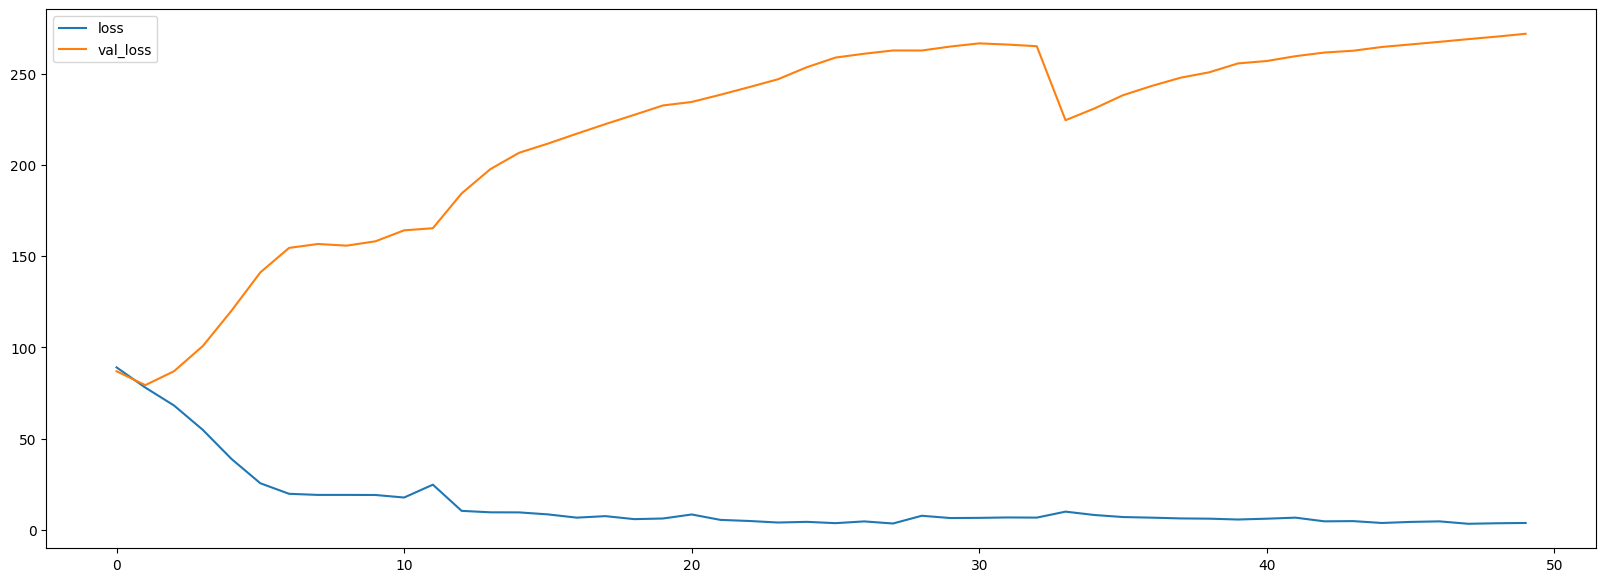

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))

plt.plot(list(range(0,50)),history.history['loss'],label="loss")
plt.plot(list(range(0,50)),history.history['val_loss'],label="val_loss")
plt.legend()
plt.show()

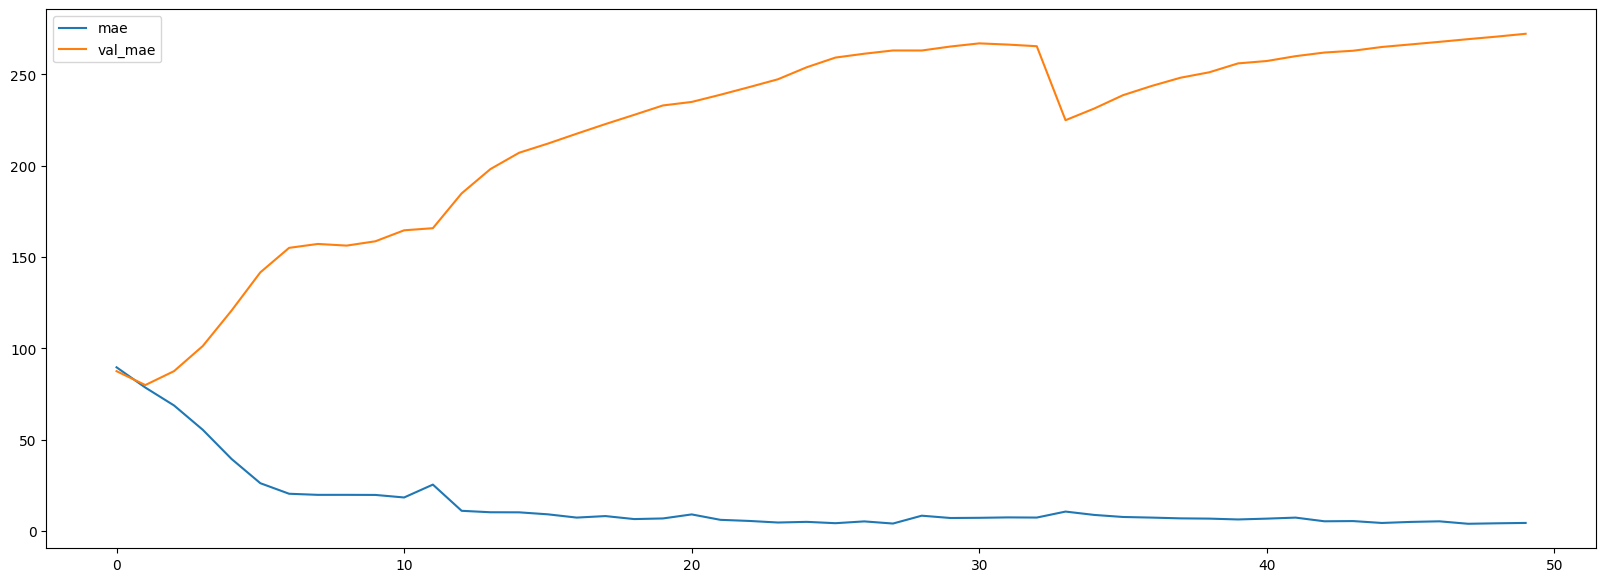

In [61]:
plt.figure(figsize=(20,7))

plt.plot(list(range(0,50)),history.history['mae'],label="mae")
plt.plot(list(range(0,50)),history.history['val_mae'],label="val_mae")
plt.legend()
plt.show()